In [1]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [7]:
# converting yes or no into 1 and 0
col = ['default','housing','loan','y']
def convert(x):
    return x.map({'yes':1,'no':0})

df[col] = df[col].apply(convert)

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [9]:
df.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [10]:
df.default.value_counts()

0    44396
1      815
Name: default, dtype: int64

In [11]:
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [12]:
df.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [13]:
df1 = df[['job','marital','education','contact','month','poutcome']]

In [14]:
df1

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown
...,...,...,...,...,...,...
45206,technician,married,tertiary,cellular,nov,unknown
45207,retired,divorced,primary,cellular,nov,unknown
45208,retired,married,secondary,cellular,nov,success
45209,blue-collar,married,secondary,telephone,nov,unknown


In [15]:
df1=pd.get_dummies(df1,drop_first=True)

In [16]:
df1

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
45207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [17]:
df=df.drop(['job','marital','education','contact','month','poutcome'],axis=1)
df.head()


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0


In [18]:
new_df = pd.concat([df,df1],axis=1)

In [19]:
new_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [20]:
new_df.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [21]:
# spliting the data into training and testing
from sklearn.model_selection import train_test_split
X=new_df.drop(['y'],axis=1)

In [22]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [23]:
Y = new_df['y']

In [24]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
# predict for x dataset
y_pred_train = model.predict(x_train)

In [29]:
y_pred_train_df = pd.DataFrame({'actual':y_train,'predicted_prob':y_pred_train})

In [30]:
y_pred_train_df

,actual,predicted_prob
13932,1,0
9894,0,0
39946,0,0
9217,0,0
4124,0,0
...,...,...
30403,0,0
21243,0,0
42613,1,0
43567,0,0


In [31]:
from sklearn.metrics import accuracy_score
print(f'Training set accuracy score :{round(accuracy_score(y_train,y_pred_train),3)}')

Training set accuracy score :0.891


In [32]:
# Testing accuracy
y_pred = model.predict(x_test)
y_pred_df = pd.DataFrame({'actual':y_test,'predicted_prob':y_pred})

In [33]:
y_pred_df

,actual,predicted_prob
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
18448,1,0
6654,0,0
17106,0,0
9025,1,0


In [34]:
print(f'Testing set accuracy score :{round(accuracy_score(y_test,y_pred),3)}')

Testing set accuracy score :0.887


#  Confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[7833  147]
 [ 872  191]]


In [36]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('\nTrue Positives(TP) = ', TP)
print('\nTrue Negatives(TN) = ', TN)
print('\nFalse Positives(FP) = ', FP)
print('\nFalse Negatives(FN) = ', FN)


True Positives(TP) =  7833

True Negatives(TN) =  191

False Positives(FP) =  147

False Negatives(FN) =  872


 The confusion matrix shows 7833+147 = 7980 correct predictions and 147+872 = 1019 incorrect predictions

# Classification report

In [37]:
# print classification accuracy 
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f'Classification accuracy : {round(classification_accuracy,4)}')

Classification accuracy : 0.8873


In [38]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(f'Classification error : {round(classification_error,4)}')


Classification error : 0.1127


In [39]:
# precision 
precision = TP/(TP+FP)
print(precision)

0.9815789473684211


In [40]:
# Recall 
recall = TP /(TP+FN)

In [41]:
recall 


0.8998276852383688

In [42]:
# specificity 
specificity = (TN/(TN+FP))
print(specificity)

0.5650887573964497


In [43]:
# F_score 
F_score = (2*precision*recall)/(precision+recall)
print('F_score',round(F_score,2))

F_score 0.94


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.57      0.18      0.27      1063

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



# ROC Curve

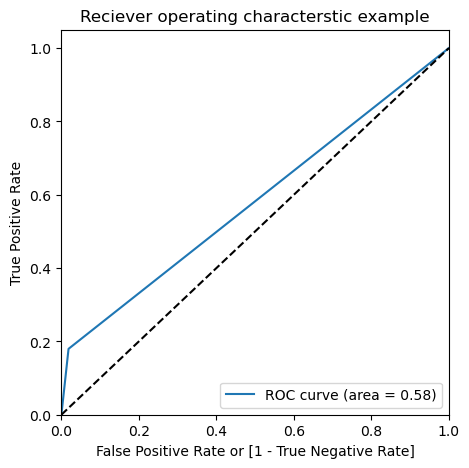

In [45]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshholds = roc_curve(y_test,y_pred)
import matplotlib.pyplot as plt
auc_score= roc_auc_score(y_test,y_pred)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characterstic example')
plt.legend(loc='lower right')
plt.show()


In [46]:
auc_score= roc_auc_score(y_test,y_pred)

In [47]:
auc_score

0.5806295489429123